# MNIST Neural Network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

In [63]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#feed forward NN

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#steps_per_epoch = len(x_train)//128

In [91]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)

In [92]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,callbacks=[lr_decay_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4377 - accuracy: 0.9117 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006.
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2171 - accuracy: 0.9488 - lr: 0.0060

Epoch 3: LearningRateScheduler setting learning rate to 0.0036.
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1489 - accuracy: 0.9633 - lr: 0.0036

Epoch 4: LearningRateScheduler setting learning rate to 0.0021599999999999996.
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1235 - accuracy: 0.9695 - lr: 0.0022

Epoch 5: LearningRateScheduler setting learning rate to 0.001296.
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1077 - accuracy: 0.9726 - lr: 0.0013

Epoch 6: LearningRateScheduler setting learning rate to 0.0007775999999999998.
Epoch 

In [93]:
# print model layers
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_87 (Dense)            (None, 200)               157000    
                                                                 
 dropout_48 (Dropout)        (None, 200)               0         
                                                                 
 dense_88 (Dense)            (None, 100)               20100     
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_89 (Dense)            (None, 60)                6060      
                                                                 
 dropout_50 (Dropout)        (None, 60)              

In [78]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 840us/step - loss: 0.1377 - accuracy: 0.9764
0.13772235810756683 0.9764000177383423


In [79]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [80]:
new_model = tf.keras.models.load_model('num_model')

In [81]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 774us/step


In [84]:
print(np.argmax(predictions[10]))

0


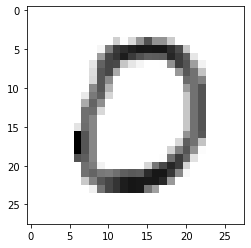

In [85]:
plt.imshow(x_test[10],cmap=plt.cm.binary)